In [30]:
import numpy as np
import math
import random 
import matplotlib.pyplot as plt

In [31]:
def sacar_posiciones(num_ciudades,cromosoma):
    posiciones = []
    elegir_ciudades = num_ciudades-1
    num_bits = (math.ceil(np.log2(elegir_ciudades)))
    i = 0    
    while elegir_ciudades > 1:
        bits = ''
        if(int(math.ceil(np.log2(elegir_ciudades))) < num_bits):
            num_bits -= 1
        for i in range (i,i+num_bits):
            bits += (cromosoma[i])
            i+=1
        posiciones.append(int(bits,2))        
        elegir_ciudades -= 1
    return posiciones

def decod_bin_local(num_ciudades,cromosoma,ciudades):
    ciudades_elegir = ciudades.copy()
    recorrido = [ciudades_elegir[0]]
    ciudades_elegir.remove(ciudades_elegir[0])
    posiciones = sacar_posiciones(num_ciudades,cromosoma)
    for pos in posiciones:
        if pos > len(ciudades_elegir)-1:
            pos -= len(ciudades_elegir)        
        siguiente_ciudad = ciudades_elegir[pos]
        ciudades_elegir.remove(siguiente_ciudad)
        recorrido.append(siguiente_ciudad)
    for ciudad in ciudades:
        if not ciudad in recorrido:
            recorrido.append(ciudad)
    return recorrido

def calcular_distancia_total(recorrido_ciudades):
    ciudad_actual = recorrido_ciudades[0]  # Obtén la primera ciudad 
    distancia_total = 0
    for i in range(1, len(recorrido_ciudades)):
        siguiente_ciudad = recorrido_ciudades[i]
        distancia_total += tabla_costes[ciudad_actual][siguiente_ciudad]
        ciudad_actual = siguiente_ciudad
    # Regresa a la ciudad de inicio
    distancia_total += tabla_costes[ciudad_actual][recorrido_ciudades[0]]
    return (distancia_total)


def generar_poblacion(tamanio_poblacion, longitud_cromosoma):
    return [''.join(random.choice('01') for _ in range(int(longitud_cromosoma))) for _ in range(tamanio_poblacion)]

def calcular_long_cromosoma(num_ciudades):
    longitud = 0
    num_bits = (math.ceil(np.log2(num_ciudades)))
    num_ciudades -= 1
    while num_ciudades > 1:
        if(int(math.ceil(np.log2(num_ciudades))) < num_bits):
            num_bits -= 1
        longitud += num_bits
        num_ciudades -=1
    return longitud


def seleccion_por_ruleta(poblacion,distancias_poblacion):
    conjunto = []
    for i in range(0,len(poblacion)-1):
        conjunto.append([poblacion[i],distancias_poblacion[i]])
    suma_distancias = sum(distancia for _, distancia in conjunto)
    # Generar una lista de rangos proporcionales a las aptitudes
    rangos = [distancia / suma_distancias for _, distancia in conjunto]  
    seleccionado = None
    r = random.uniform(0, 1)
    acumulado = 0
    for i, rango in enumerate(rangos):
        acumulado += rango
        if acumulado >= r:
            seleccionado = poblacion[i]
            break
    return seleccionado

def seleccionar_individuo_torneo(poblacion, aptitudes):
    k=5
    population_size = len(poblacion)
    tournament = random.sample(range(population_size), k)  # Selecciona 'k' individuos al azar para el torneo
    winner = min(tournament, key=lambda i: aptitudes[i])  # Elige al individuo con la menor aptitud en el torneo
    winner = poblacion[winner]
    return winner

def mutar_individuo(individuo, num_generaciones):
    probabilidad_mutacion = 0.5
    if num_generaciones > 10000:
        probabilidad_mutacion = probabilidad_mutacion/2
    if num_generaciones > 20000:
        probabilidad_mutacion = probabilidad_mutacion/4
    if num_generaciones > 35000:
        probabilidad_mutacion = probabilidad_mutacion/6
    mutado = list(individuo)
    for i in range(len(individuo)):
        if random.random() < probabilidad_mutacion:
            # Cambia el bit si la probabilidad de mutación se cumple
            mutado[i] = '0' if individuo[i] == '1' else '1'
    return ''.join(mutado)

def cruzar_un_punto(padre1,padre2):
    #punto_cruce = random.randint(0, len(padre1)-1)
    punto_cruce = len(padre1)//2
    hijo1 = padre1[0:punto_cruce] + padre2[punto_cruce:len(padre1)]
    hijo2 = padre2[0:punto_cruce] + padre1[punto_cruce:len(padre1)]
    return hijo1,hijo2

def cruzar_dos_puntos(padre1,padre2):
    punto_cruce = random.randint(0, len(padre1)//2)
    punto_cruce2 = random.randint(len(padre1)//2, 40)
    hijo1 = padre1[0:punto_cruce] + padre2[punto_cruce:punto_cruce2] + padre1[punto_cruce2:len(padre1)]
    hijo2 = padre2[0:punto_cruce] + padre1[punto_cruce:punto_cruce2] + padre2[punto_cruce2:len(padre1)]
    return hijo1,hijo2


def seleccionar_mejor(poblacion,distancias_poblacion):
    mejor_individuo = poblacion[distancias_poblacion.index(min(distancias_poblacion))]
    poblacion.remove(mejor_individuo)
    mejor_distancia = min(distancias_poblacion)
    distancias_poblacion.remove(min(distancias_poblacion))
    return mejor_individuo,mejor_distancia

In [32]:
import time
tiempo_limite = 3600
tiempo_inicio = time.time()
tabla_costes = np.load('tsp.lg.npy') 
num_ciudades = len(tabla_costes)
tamanio_poblacion = num_ciudades
longitud_cromosoma = calcular_long_cromosoma(num_ciudades)
ciudades = list(range(0,num_ciudades))
parar = False
num_generaciones = 0
max_gen_sin_evol = 10000
probabilidad_mutacion = 0.6
minimo = 100000
gen_sin_evol = 0
mejores_soluciones = []
mejores_individuos = []
datos = []
indx = 0
aptitudgraph = []

#crear poblacion inicial
poblacion = generar_poblacion(tamanio_poblacion,longitud_cromosoma)

Generación 0: Mejor individuo - 01110011100100110011110101101001110010010011000010011001110010000011010011001010010011100111101001000101110011101000110000111011001110110111111011101000111111101000000110110111110000011110010010010100001000011001011010000000000101111001010001001110110100011000101011100101011100110111000110100001100011010000011101001010000110010001011101001011000111011111110101000110111000001110001011000110111100001111011001010010001101111111011101101000011010010010001001110110111111110100100110010100011111001011111001011101110010001111000101010101011010010111101110001010100010111111100011011110110001001111111101010101111110010100011110111000100111110010010000111100111010011101000001100100011001101101010111011101011110101111110001001000100000111110100000101000100011001111010000111001010000100100010110000000111111001110010111101101111011011001011011000010010001100011010011000000110001110111100000100011000111001100000110101000001111010001111010100010111001110001110110101000

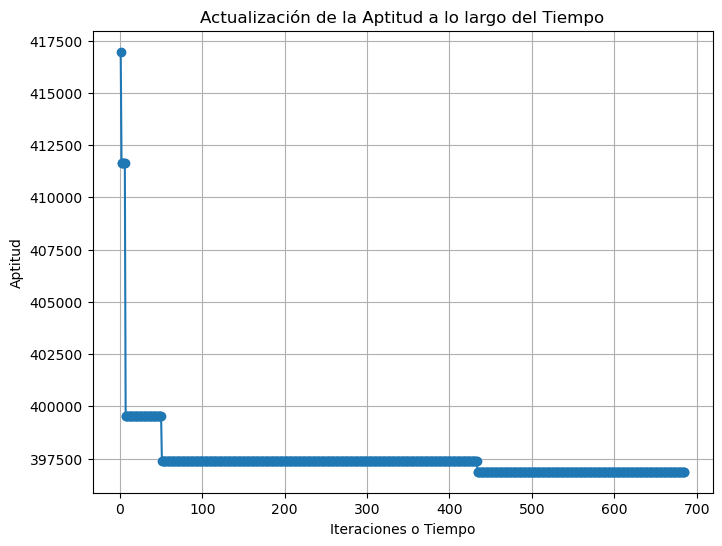

In [33]:
while indx < 1:
    # Evaluación de aptitud
    aptitudes = [calcular_distancia_total(decod_bin_local(num_ciudades,cromosoma,ciudades)) for cromosoma in poblacion]
    mejor_individuo = poblacion[aptitudes.index(min(aptitudes))]
    # Selección
    nueva_poblacion = []
    

    for _ in range(tamanio_poblacion // 2):
        padre1 = seleccionar_individuo_torneo(poblacion, aptitudes)
        padre2 = seleccionar_individuo_torneo(poblacion, aptitudes)

        hijo1, hijo2 = cruzar_un_punto(padre1, padre2)
        nueva_poblacion.extend([hijo1, hijo2])

    nueva_poblacion = [mutar_individuo(individuo,num_generaciones) for individuo in nueva_poblacion]

    # Reemplazar la población anterior con la nueva población
    poblacion = nueva_poblacion
    poblacion[aptitudes.index(max(aptitudes))] = mejor_individuo


    # Mostrar la aptitud del mejor individuo en esta generación
    aptitudes = [calcular_distancia_total(decod_bin_local(num_ciudades,cromosoma,ciudades)) for cromosoma in poblacion]
    mejor_individuo_generacion = poblacion[aptitudes.index(min(aptitudes))]
    mejor_aptitud_generacion = min(aptitudes)
    if(num_generaciones % 1 == 0): # Every 1 epochs


        print(f"Generación {num_generaciones}: Mejor individuo - {mejor_individuo_generacion}, Aptitud: {mejor_aptitud_generacion}")
    
    aptitudgraph.append(mejor_aptitud_generacion)
    num_generaciones += 1
    tiempo_transcurrido = time.time() - tiempo_inicio
    if tiempo_transcurrido >= tiempo_limite: indx += 1
print(f"mejor solucion Aptitud: {mejor_aptitud_generacion}")
iteraciones = list(range(1, len(aptitudgraph) + 1))

# Crea la gráfica de línea
plt.figure(figsize=(8, 6))
plt.plot(iteraciones, aptitudgraph, marker='o', linestyle='-')
plt.title('Actualización de la Aptitud a lo largo del Tiempo')
plt.xlabel('Iteraciones o Tiempo')
plt.ylabel('Aptitud')
plt.grid(True)

# Muestra la gráfica
plt.show()